In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
file_list = ["DE_genes_cebpa_ko.txt", "DE_genes_cebpe_ko.txt", "DE_genes_combined.txt", 
             "genes_most_affected_edges_cebpa_mean_diff.txt", "genes_most_affected_edges_cebpa_uncert.txt", 
             "genes_most_affected_edges_cebpe_mean_diff.txt", "genes_most_affected_edges_cebpe_uncert.txt",
             "genes_most_affected_edges_combined_diff_and_uncert.txt", "genes_most_affected_edges_combined_mean_diff.txt", "genes_most_affected_edges_combined_uncert.txt",
             "rand_subsamp_genes_0.txt", 
             "genie3_affected_genes_unsorted.txt", "genie3_affected_genes_cebpa.txt", "genie3_affected_genes_cebpe.txt",
             "genie3_grn_affected_genes_unsorted.txt", "genie3_grn_affected_genes_cebpa.txt", "genie3_grn_affected_genes_cebpe.txt",
             "genie3_difference_affected_genes_cebpa.txt", "genie3_difference_affected_genes_cebpe.txt",
             "genie3_difference_grn_affected_genes_cebpa.txt", "genie3_difference_grn_affected_genes_cebpe.txt",
             "genes_pvalue_obs.txt", "genes_pvalue_cebpa.txt", "genes_pvalue_cebpe.txt"]

method_name_list = ["DE genes Cebpa KO", "DE genes Cebpe KO", "DE genes (geometric average of both KO)", 
                    "FLeCS Cebpa KO (mean difference)", "FLeCS Cebpa KO (uncertainty)", 
                    "FLeCS Cebpe KO (mean difference)", "FLeCS Cebpe KO (uncertainty)",
                    "FLeCS both KO (mean difference + uncertainty)", "FLeCS both KO (mean difference)", "FLeCS both KO (uncertainty)",
                    "Random",
                    "GENIE3 unsorted", "GENIE3 Cebpa KO", "GENIE3 Cebpe KO",
                    "GENIE3 with GRN prior unsorted", "GENIE3 with GRN prior Cebpa KO", "GENIE3 with GRN prior Cebpe KO",
                    "GENIE3 Cebpa KO (difference)", "GENIE3 Cebpe KO (difference)",
                    "GENIE3 with GRN prior Cebpa KO (difference)", "GENIE3 with GRN prior Cebpe KO (difference)",
                    "FLeCS unsorted", "FLeCS Cebpa KO", "FLeCS Cebpe KO",]

all_results = {}
for file in file_list:
    all_results[file] = pd.read_csv("logs/analysis_ " + file, sep="\t", skiprows=11)

In [3]:
all_res_df = []

for file, name in zip(file_list, method_name_list):
    res_df = pd.DataFrame(list(all_results[file][file + ' (raw P-value)']))
    res_df.columns = ["P-value"]
    res_df["method"] = name
    all_res_df.append(res_df)

all_res_df = pd.concat(all_res_df)

## Compare default graphs

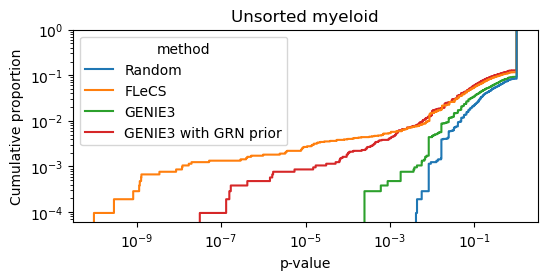

In [73]:
this_plot_methods = ["Random", "FLeCS unsorted", "GENIE3 unsorted", "GENIE3 with GRN prior unsorted"]
this_plot_df = all_res_df[all_res_df["method"].apply(lambda m: m in this_plot_methods)].copy()

new_name_dict = {"Random": "Random",  "FLeCS unsorted": "FLeCS",  "GENIE3 unsorted": "GENIE3" ,"GENIE3 with GRN prior unsorted": "GENIE3 with GRN prior"}
this_plot_df["method"] = this_plot_df["method"].apply(lambda x: new_name_dict[x])
new_name_methods = [new_name_dict[x] for x in this_plot_methods]

f, axes = plt.subplots(1, 1, figsize=(6, 2.5), sharex=True)
g = sns.ecdfplot(data=this_plot_df, x="P-value", hue="method", hue_order=new_name_methods, log_scale=(True, True), ax=axes)
g.set_title("Unsorted myeloid")

plt.xlabel("p-value")
plt.ylabel("Cumulative proportion")
plt.show()

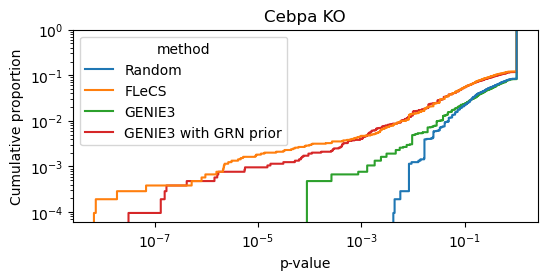

In [74]:
this_plot_methods = ["Random", "FLeCS Cebpa KO", "GENIE3 Cebpa KO", "GENIE3 with GRN prior Cebpa KO"]
this_plot_df = all_res_df[all_res_df["method"].apply(lambda m: m in this_plot_methods)].copy()

new_name_dict = {"Random": "Random",  "FLeCS Cebpa KO": "FLeCS",  "GENIE3 Cebpa KO": "GENIE3" ,"GENIE3 with GRN prior Cebpa KO": "GENIE3 with GRN prior"}
this_plot_df["method"] = this_plot_df["method"].apply(lambda x: new_name_dict[x])
new_name_methods = [new_name_dict[x] for x in this_plot_methods]

f, axes = plt.subplots(1, 1, figsize=(6, 2.5), sharex=True)
g = sns.ecdfplot(data=this_plot_df, x="P-value", hue="method", hue_order=new_name_methods, log_scale=(True, True), ax=axes)
g.set_title("Cebpa KO")

plt.xlabel("p-value")
plt.ylabel("Cumulative proportion")
plt.show()

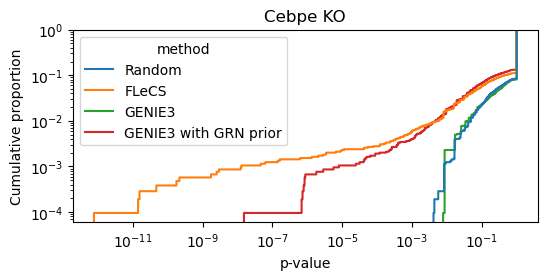

In [75]:
this_plot_methods = ["Random", "FLeCS Cebpe KO", "GENIE3 Cebpe KO", "GENIE3 with GRN prior Cebpe KO"]
this_plot_df = all_res_df[all_res_df["method"].apply(lambda m: m in this_plot_methods)].copy()

new_name_dict = {"Random": "Random",  "FLeCS Cebpe KO": "FLeCS",  "GENIE3 Cebpe KO": "GENIE3" ,"GENIE3 with GRN prior Cebpe KO": "GENIE3 with GRN prior"}
this_plot_df["method"] = this_plot_df["method"].apply(lambda x: new_name_dict[x])
new_name_methods = [new_name_dict[x] for x in this_plot_methods]

f, axes = plt.subplots(1, 1, figsize=(6, 2.5), sharex=True)
g = sns.ecdfplot(data=this_plot_df, x="P-value", hue="method", hue_order=new_name_methods, log_scale=(True, True), ax=axes)
g.set_title("Cebpe KO")

plt.xlabel("p-value")
plt.ylabel("Cumulative proportion")
plt.show()

## Compare differences across environments

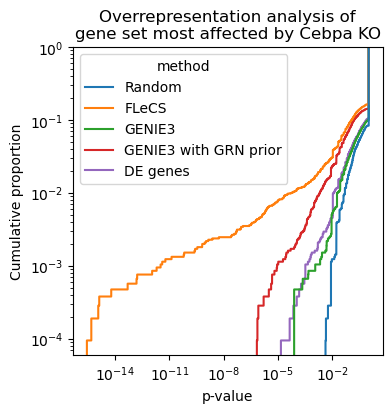

In [63]:
this_plot_methods = ["Random", "FLeCS Cebpa KO (mean difference)", "GENIE3 Cebpa KO (difference)", "GENIE3 with GRN prior Cebpa KO (difference)", "DE genes Cebpa KO"]
this_plot_df = all_res_df[all_res_df["method"].apply(lambda m: m in this_plot_methods)].copy()

new_name_dict = {"Random": "Random", "FLeCS Cebpa KO (mean difference)": "FLeCS",  "GENIE3 Cebpa KO (difference)": "GENIE3" ,"GENIE3 with GRN prior Cebpa KO (difference)": "GENIE3 with GRN prior" , "DE genes Cebpa KO": "DE genes"}
this_plot_df["method"] = this_plot_df["method"].apply(lambda x: new_name_dict[x])
new_name_methods = [new_name_dict[x] for x in this_plot_methods]

f, axes = plt.subplots(1, 1, figsize=(4, 4), sharex=True)
g = sns.ecdfplot(data=this_plot_df, x="P-value", hue="method", 
                 hue_order=new_name_methods, 
                 log_scale=(True, True), ax=axes)
g.set_title("cumulative density")
plt.title("Overrepresentation analysis of\ngene set most affected by Cebpa KO")
plt.xlabel("p-value")
plt.ylabel("Cumulative proportion")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


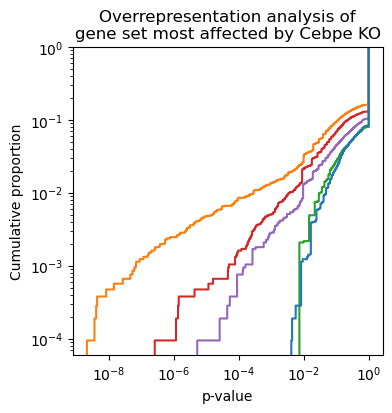

In [64]:
this_plot_methods = ["Random", "FLeCS Cebpe KO (mean difference)", "GENIE3 Cebpe KO (difference)", "GENIE3 with GRN prior Cebpe KO (difference)", "DE genes Cebpe KO"]
this_plot_df = all_res_df[all_res_df["method"].apply(lambda m: m in this_plot_methods)].copy()

new_name_dict = {"Random": "Random", "FLeCS Cebpe KO (mean difference)": "FLeCS",  "GENIE3 Cebpe KO (difference)": "GENIE3" ,"GENIE3 with GRN prior Cebpe KO (difference)": "GENIE3 with GRN prior" , "DE genes Cebpe KO": "DE genes"}
this_plot_df["method"] = this_plot_df["method"].apply(lambda x: new_name_dict[x])
new_name_methods = [new_name_dict[x] for x in this_plot_methods]

f, axes = plt.subplots(1, 1, figsize=(4, 4), sharex=True)
g = sns.ecdfplot(data=this_plot_df, x="P-value", hue="method", 
                 hue_order=new_name_methods, 
                 log_scale=(True, True), ax=axes)
g.set_title("cumulative density")
plt.title("Overrepresentation analysis of\ngene set most affected by Cebpe KO")
plt.xlabel("p-value")
plt.ylabel("Cumulative proportion")
plt.legend().remove()

plt.show()

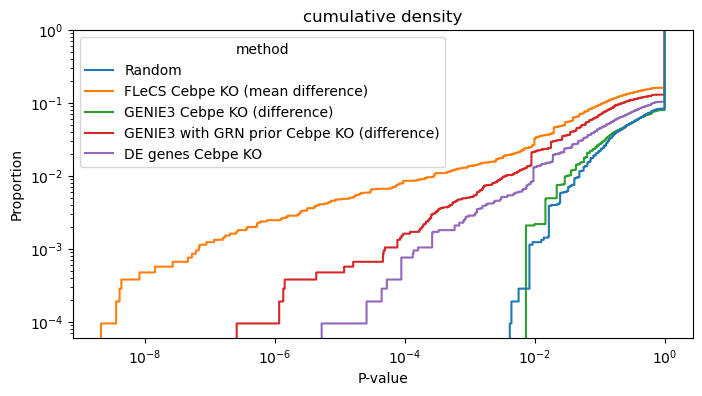

In [8]:
this_plot_methods = ["Random", "FLeCS Cebpe KO (mean difference)", "GENIE3 Cebpe KO (difference)", "GENIE3 with GRN prior Cebpe KO (difference)", "DE genes Cebpe KO"]
this_plot_df = all_res_df[all_res_df["method"].apply(lambda m: m in this_plot_methods)]

f, axes = plt.subplots(1, 1, figsize=(8, 4), sharex=True)
g = sns.ecdfplot(data=this_plot_df, x="P-value", hue="method", hue_order=this_plot_methods, log_scale=(True, True), ax=axes)
g.set_title("cumulative density")
plt.show()

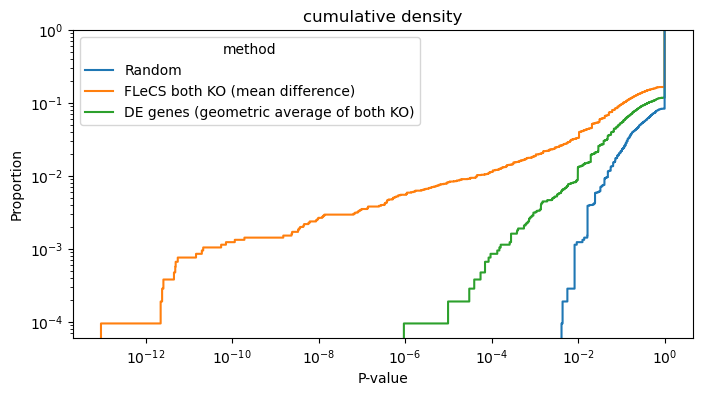

In [9]:
this_plot_methods = ["Random", "FLeCS both KO (mean difference)", "DE genes (geometric average of both KO)"]
this_plot_df = all_res_df[all_res_df["method"].apply(lambda m: m in this_plot_methods)]

f, axes = plt.subplots(1, 1, figsize=(8, 4), sharex=True)
g = sns.ecdfplot(data=this_plot_df, x="P-value", hue="method", hue_order=this_plot_methods, log_scale=(True, True), ax=axes)
g.set_title("cumulative density")
plt.show()

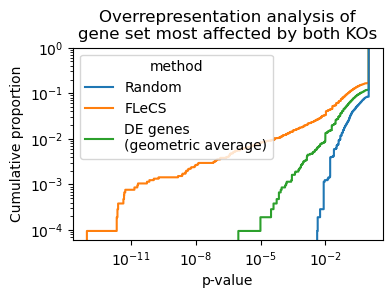

In [80]:
this_plot_methods = ["Random", "FLeCS both KO (mean difference)", "DE genes (geometric average of both KO)"]
this_plot_df = all_res_df[all_res_df["method"].apply(lambda m: m in this_plot_methods)].copy()

new_name_dict = {"Random": "Random", "FLeCS both KO (mean difference)": "FLeCS", "DE genes (geometric average of both KO)": "DE genes\n(geometric average)"}
this_plot_df["method"] = this_plot_df["method"].apply(lambda x: new_name_dict[x])
new_name_methods = [new_name_dict[x] for x in this_plot_methods]

f, axes = plt.subplots(1, 1, figsize=(4, 2.5), sharex=True)
g = sns.ecdfplot(data=this_plot_df, x="P-value", hue="method", 
                 hue_order=new_name_methods, 
                 log_scale=(True, True), ax=axes)
g.set_title("cumulative density")
plt.title("Overrepresentation analysis of\ngene set most affected by both KOs")
plt.xlabel("p-value")
plt.ylabel("Cumulative proportion")

plt.show()

## Compare different scores for FLeCS

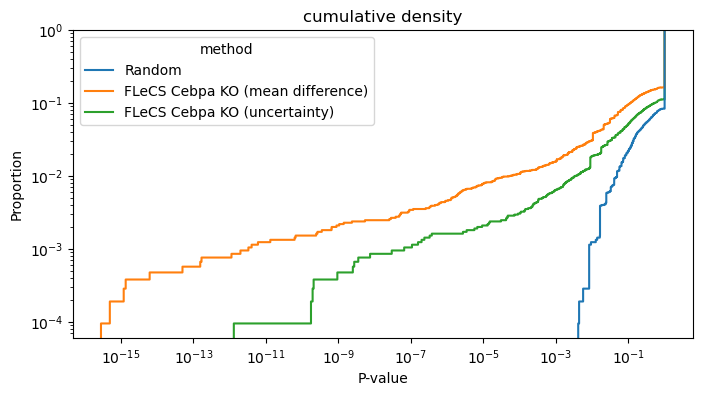

In [10]:
this_plot_methods = ["Random", "FLeCS Cebpa KO (mean difference)", "FLeCS Cebpa KO (uncertainty)"]
this_plot_df = all_res_df[all_res_df["method"].apply(lambda m: m in this_plot_methods)]

f, axes = plt.subplots(1, 1, figsize=(8, 4), sharex=True)
g = sns.ecdfplot(data=this_plot_df, x="P-value", hue="method", hue_order=this_plot_methods, log_scale=(True, True), ax=axes)
g.set_title("cumulative density")
plt.show()

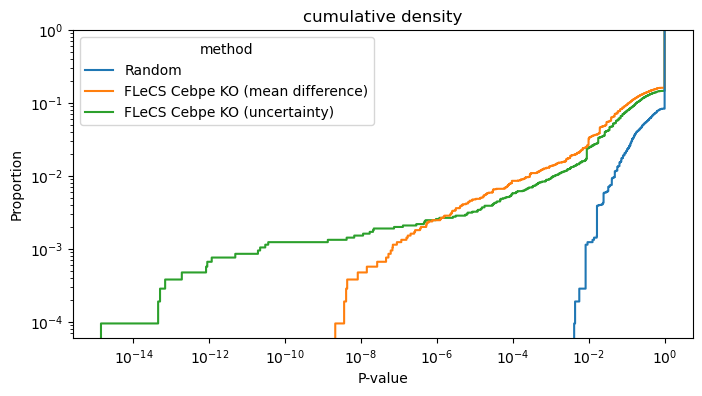

In [11]:
this_plot_methods = ["Random", "FLeCS Cebpe KO (mean difference)", "FLeCS Cebpe KO (uncertainty)"]
this_plot_df = all_res_df[all_res_df["method"].apply(lambda m: m in this_plot_methods)]

f, axes = plt.subplots(1, 1, figsize=(8, 4), sharex=True)
g = sns.ecdfplot(data=this_plot_df, x="P-value", hue="method", hue_order=this_plot_methods, log_scale=(True, True), ax=axes)
g.set_title("cumulative density")
plt.show()

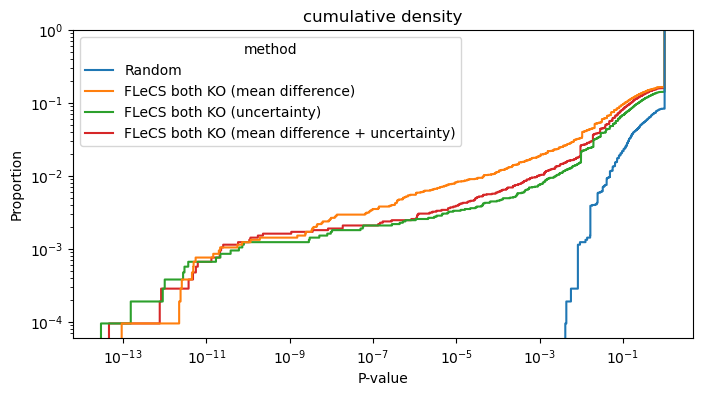

In [12]:
this_plot_methods = ["Random", "FLeCS both KO (mean difference)", "FLeCS both KO (uncertainty)", "FLeCS both KO (mean difference + uncertainty)"]
this_plot_df = all_res_df[all_res_df["method"].apply(lambda m: m in this_plot_methods)]

f, axes = plt.subplots(1, 1, figsize=(8, 4), sharex=True)
g = sns.ecdfplot(data=this_plot_df, x="P-value", hue="method", hue_order=this_plot_methods, log_scale=(True, True), ax=axes)
g.set_title("cumulative density")
plt.show()

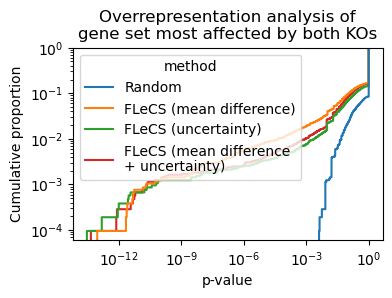

In [84]:
this_plot_methods = ["Random", "FLeCS both KO (mean difference)", "FLeCS both KO (uncertainty)", "FLeCS both KO (mean difference + uncertainty)"]
this_plot_df = all_res_df[all_res_df["method"].apply(lambda m: m in this_plot_methods)].copy()

new_name_dict = {"Random": "Random", "FLeCS both KO (mean difference)": "FLeCS (mean difference)", "FLeCS both KO (uncertainty)": "FLeCS (uncertainty)",  "FLeCS both KO (mean difference + uncertainty)":  "FLeCS (mean difference\n+ uncertainty)"}
this_plot_df["method"] = this_plot_df["method"].apply(lambda x: new_name_dict[x])
new_name_methods = [new_name_dict[x] for x in this_plot_methods]

f, axes = plt.subplots(1, 1, figsize=(4, 2.5), sharex=True)
g = sns.ecdfplot(data=this_plot_df, x="P-value", hue="method", 
                 hue_order=new_name_methods, 
                 log_scale=(True, True), ax=axes)
g.set_title("cumulative density")
plt.title("Overrepresentation analysis of\ngene set most affected by both KOs")
plt.xlabel("p-value")
plt.ylabel("Cumulative proportion")

plt.show()

## Plot most enriched GO terms

In [13]:
signif_only_results = pd.read_csv("logs/analysis_ genes_most_affected_edges_combined_diff_and_uncert_significant_only.txt", sep="\t", skiprows=11)

In [14]:
signif_only_results["genes_most_affected_edges_combined_diff_and_uncert.txt (fold Enrichment)"] = \
    signif_only_results["genes_most_affected_edges_combined_diff_and_uncert.txt (fold Enrichment)"].apply(lambda x: "100" if x == " > 100" else x).astype(float)

In [15]:
signif_only_results = signif_only_results.rename(columns={"genes_most_affected_edges_combined_diff_and_uncert.txt (raw P-value)": 
                                                                  "P-value"})

signif_only_results["- log(P-value)"] = signif_only_results["P-value"].apply(lambda x: -np.log(x))

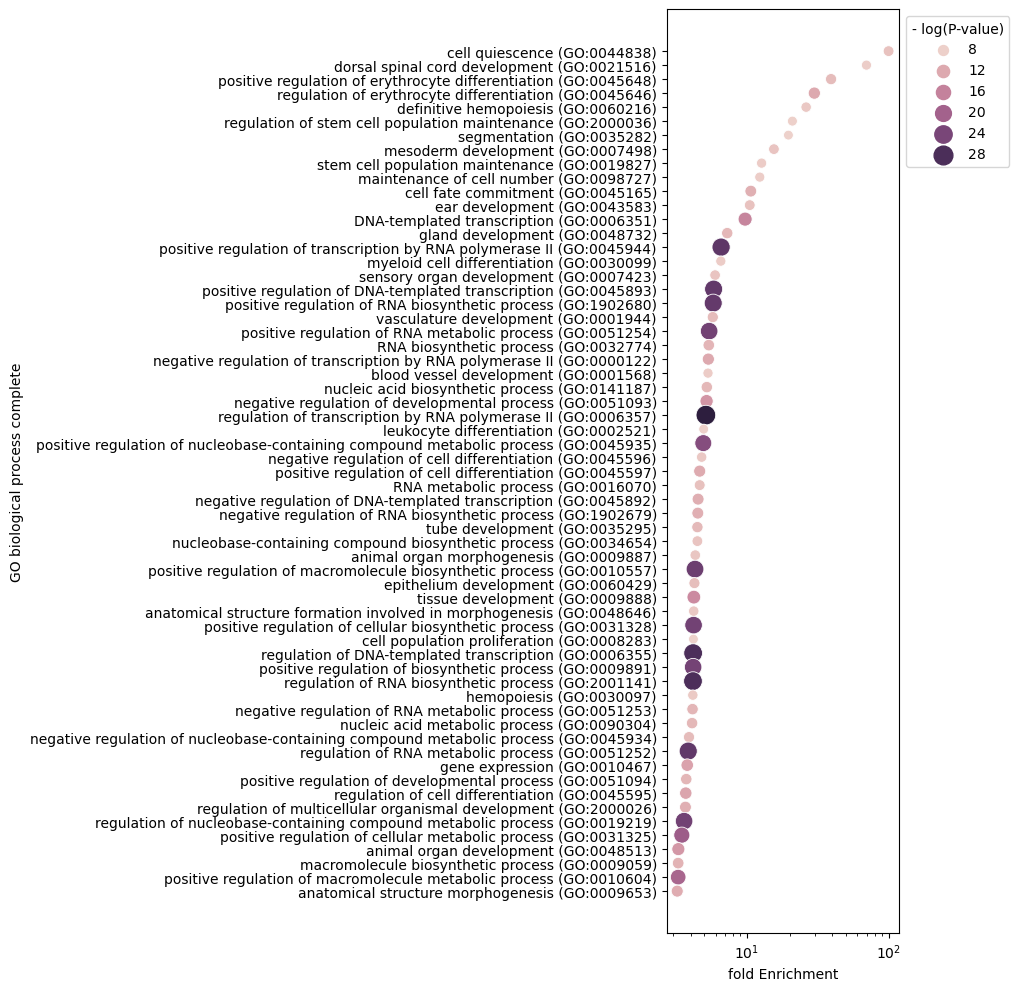

In [16]:
plt.figure(figsize=(3, 12))
# plt.figure(figsize=(6, 12))
plt.xscale("log")
ax = sns.scatterplot(data=signif_only_results.loc[:60], 
                     y="GO biological process complete", 
                 x="genes_most_affected_edges_combined_diff_and_uncert.txt (fold Enrichment)",  
                hue="- log(P-value)", 
                size="- log(P-value)",
                sizes=(50, 200))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("fold Enrichment")
plt.show()